In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# using OneHotEncoder too handle categorical values in the data (categorical to numerical value transformations)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split

# For baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# for voting classifier
from sklearn.ensemble import VotingClassifier

# to save the model
import joblib

dataframe = pd.read_csv("brainStroke_data.csv")

In [2]:
dataframe

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
dataframe['stroke'].unique()

array([1, 0])

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
dataframe.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
dataframe.describe().T 
# transpose of describe() dataframe

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [7]:
dataframe.nunique()
# to calcultae number of unique values in each column

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [8]:
dataframe.duplicated().sum()

0

In [9]:
# 0 means we dont have any duplicated value

In [10]:
dataframe['age'].unique().tolist()

[67.0,
 80.0,
 49.0,
 79.0,
 81.0,
 74.0,
 69.0,
 78.0,
 61.0,
 54.0,
 50.0,
 64.0,
 75.0,
 60.0,
 71.0,
 52.0,
 82.0,
 65.0,
 57.0,
 42.0,
 48.0,
 72.0,
 58.0,
 76.0,
 39.0,
 77.0,
 63.0,
 73.0,
 56.0,
 45.0,
 70.0,
 59.0,
 66.0,
 43.0,
 68.0,
 47.0,
 53.0,
 38.0,
 55.0,
 46.0,
 32.0,
 51.0,
 14.0,
 3.0,
 8.0,
 37.0,
 40.0,
 35.0,
 20.0,
 44.0,
 25.0,
 27.0,
 23.0,
 17.0,
 13.0,
 4.0,
 16.0,
 22.0,
 30.0,
 29.0,
 11.0,
 21.0,
 18.0,
 33.0,
 24.0,
 36.0,
 0.64,
 34.0,
 41.0,
 0.88,
 5.0,
 26.0,
 31.0,
 7.0,
 12.0,
 62.0,
 2.0,
 9.0,
 15.0,
 28.0,
 10.0,
 1.8,
 0.32,
 1.08,
 19.0,
 6.0,
 1.16,
 1.0,
 1.4,
 1.72,
 0.24,
 1.64,
 1.56,
 0.72,
 1.88,
 1.24,
 0.8,
 0.4,
 0.08,
 1.48,
 0.56,
 1.32,
 0.16,
 0.48]

In [11]:
sorted(dataframe['age'].unique().tolist())
# Sort the data of age column in ascending order

[0.08,
 0.16,
 0.24,
 0.32,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 1.0,
 1.08,
 1.16,
 1.24,
 1.32,
 1.4,
 1.48,
 1.56,
 1.64,
 1.72,
 1.8,
 1.88,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0]

In [12]:
# dataframe['age'] = dataframe['age'].astype(int)
# convert the datatype of age column from float to int

In [13]:
dataframe['gender'].value_counts()
# count the number of male and female in the dataframe

gender
Female    2907
Male      2074
Name: count, dtype: int64

In [14]:
sns.set_style("darkgrid")

In [15]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [16]:
no_stroke_data = dataframe[dataframe['stroke'] == 0]
# person having no stroke
stroke_data = dataframe[dataframe['stroke'] == 1]
# person having stroke

In [17]:
stroke_count = dataframe['stroke'].value_counts()
stroke_count

stroke
0    4733
1     248
Name: count, dtype: int64

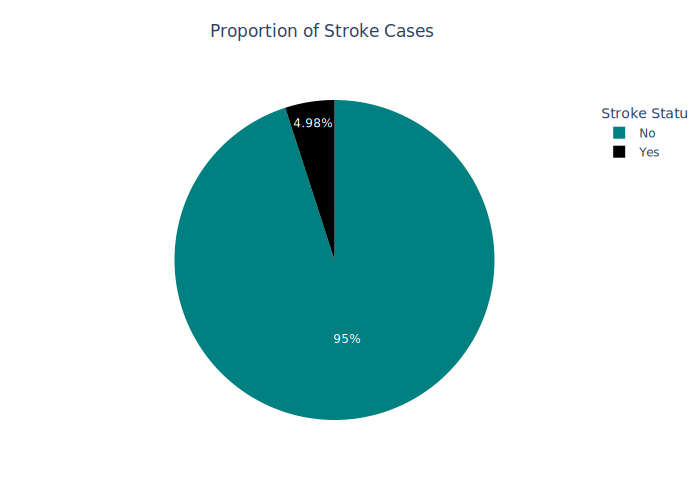

In [18]:
fig = px.pie(
      stroke_count, values = stroke_count.values, names = ['No', 'Yes'],
      title = 'Proportion of Stroke Cases',
      color_discrete_sequence = plot_color
)

fig.update_layout(legend_title_text = 'Stroke Status', title_x = 0.3, title_y = 0.95)
fig.show('svg')

# this requires plotly/Kaleido to download
# plotly requires to download google chrome 

In [19]:
def custom_histograms(columns:str, titles:list) -> go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles = ['No Stroke', 'Yes Stroke'])
    histrogram_no_stroke = px.histogram(no_stroke_data, x = columns, color_discrete_sequence=['#008080'])
    histrogram_stroke = px.histogram(stroke_data, x = columns, color_discrete_sequence=['black'])
    fig.add_trace(histrogram_no_stroke['data'][0], row=1, col=1)
    fig.add_trace(histrogram_stroke['data'][0], row=1, col=2)
    fig.update_layout(title = titles[0], title_x = 0.5) 
    fig.update_xaxes(title_text = titles[1]) 
    fig.update_yaxes(title_text = 'Count') 
    return fig



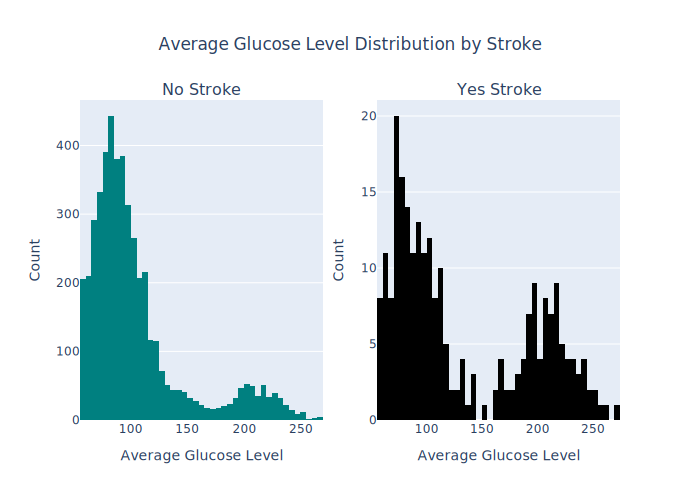

In [20]:
fig = custom_histograms('avg_glucose_level', ['Average Glucose Level Distribution by Stroke', 'Average Glucose Level'])
fig.show('svg')

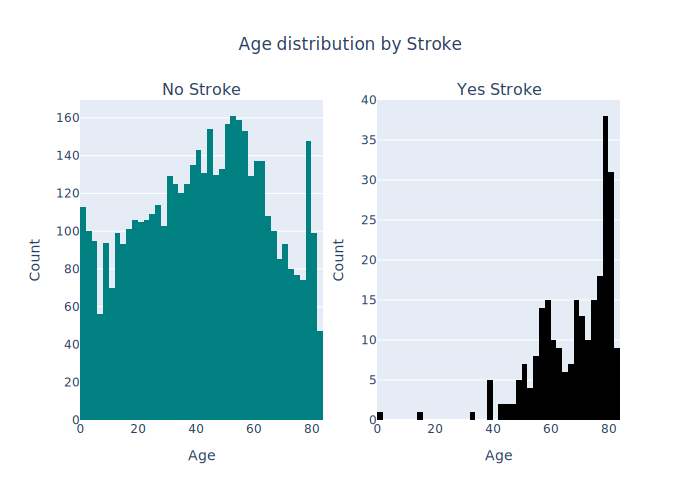

In [21]:
fig = custom_histograms('age', ['Age distribution by Stroke', 'Age'])
fig.show('svg')

In [22]:
stroke_data['bmi'].mean()
# bmi at which brain stroke chance is high

30.186693548387094

In [23]:
no_stroke_data['bmi'].mean()
# bmi at which brain stroke chance is low

28.4096978660469

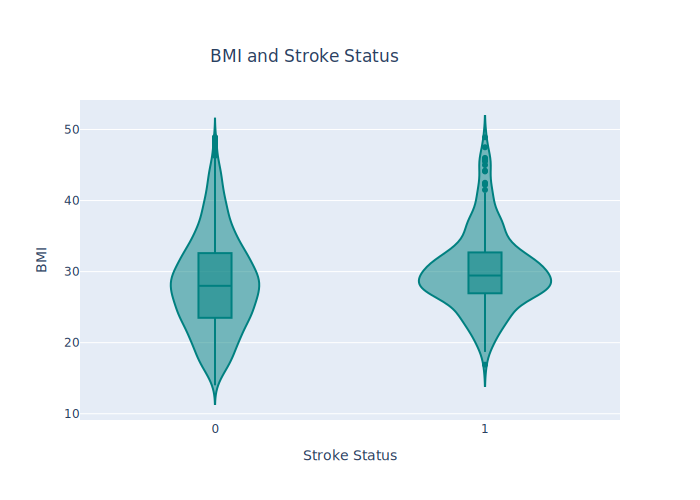

In [24]:
fig = px.violin(dataframe, y = 'bmi', x = 'stroke', box = True, width = 700,
               height = 500, color_discrete_sequence = plot_color, title = 'BMI and Stroke Status',
               labels = {'stroke': 'Stroke Status', 'bmi': 'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
fig.show('svg')

# first graph is for no_stroke and second graph is for braine stroke

In [25]:
dataframe.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

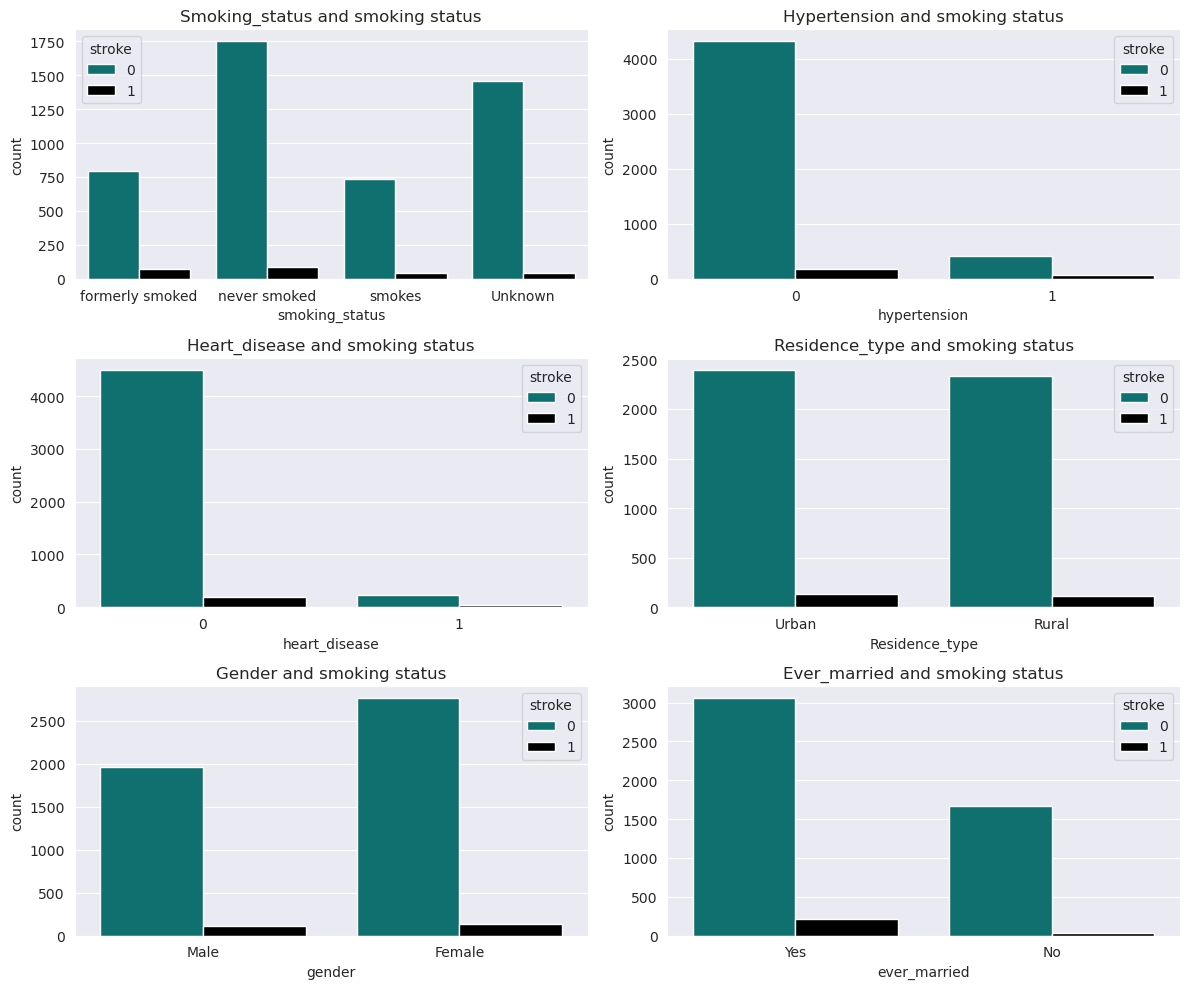

In [26]:
# subplots of x_values with stoke 

x_values = ['smoking_status', 'hypertension', 'heart_disease', 'Residence_type', 'gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12,10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = dataframe, x = x_value, hue = 'stroke', ax = ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

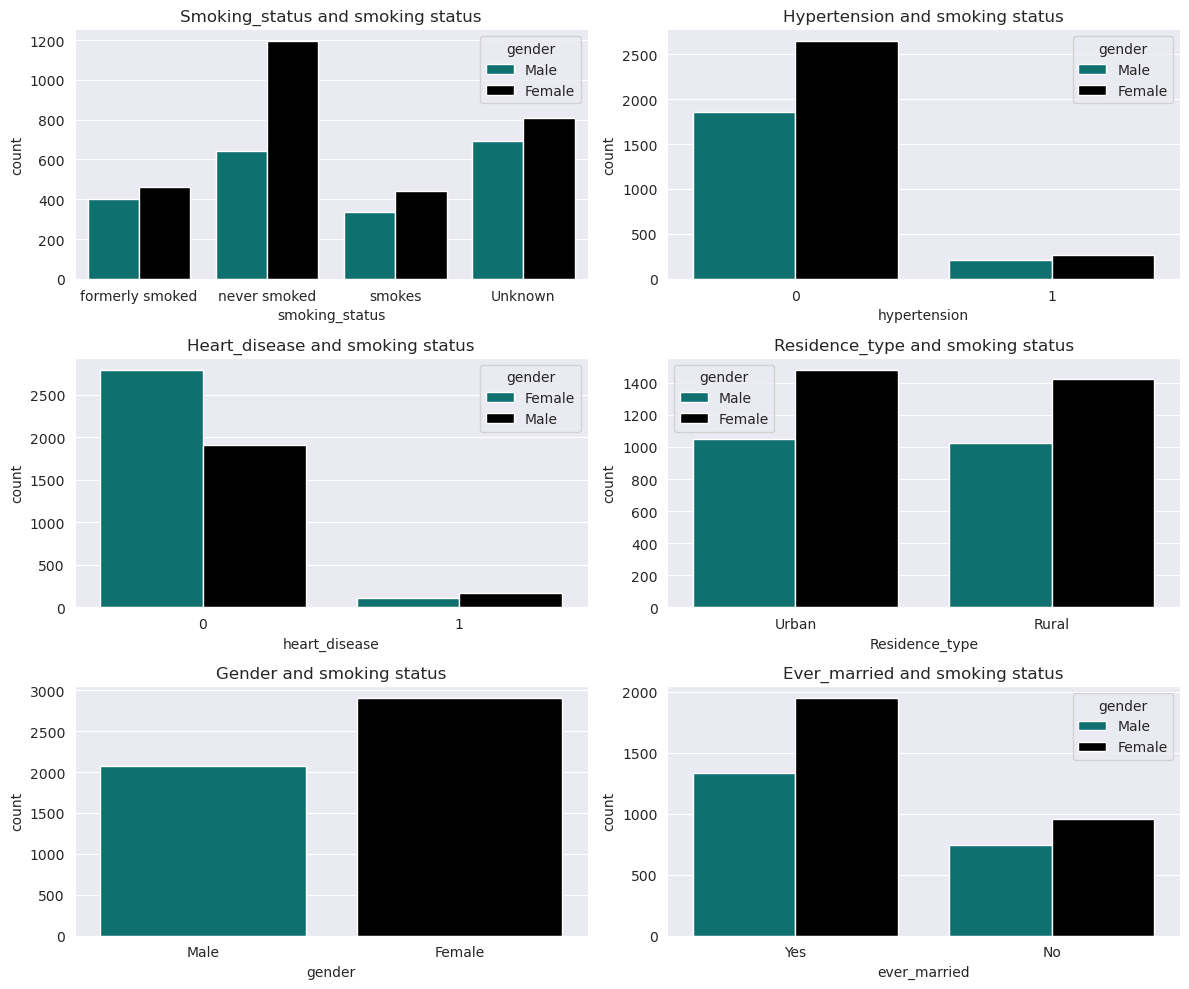

In [27]:
# subplots of x_values with gender (just of example)

x_values = ['smoking_status', 'hypertension', 'heart_disease', 'Residence_type', 'gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12,10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = dataframe, x = x_value, hue = 'gender', ax = ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

In [28]:
set_config(display = 'diagram')
dataframe.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [29]:
input_cols = list(dataframe.columns)[0:-1]
# input_cols has all columns except stroke
df_inputs = dataframe[input_cols]

target_col = 'stroke'
df_target = dataframe[target_col]

# to get numerical columns from the dataframe
numerical_cols = dataframe[input_cols].select_dtypes(include = np.number).columns.to_list()
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [30]:
# to get categorical columns from the dataframe
categorical_cols = dataframe[input_cols].select_dtypes(include = 'object').columns.to_list()
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [31]:
dataframe['smoking_status'].unique() 

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [32]:
# similarly
# dataframe['gender'].unique() 

In [33]:
# similarly
# dataframe['heart_disease'].unique()

In [34]:
ordinary_enc = OrdinalEncoder(categories=[['Unknown', 'never smoked', 'formerly smoked', 'smokes']])
# OrdinalEncoder is used to convert categorical values into interger in a given specific order.

onehot_enc = OneHotEncoder(handle_unknown='ignore')
#OneHotEncoder converts categorical variables into a one-hot (binary) format — one column for each category.
# If during transform you encounter a category that wasn’t seen during fit, it will simply fill that row with zeros instead of raising an error.


In [35]:
preprocesssor = ColumnTransformer([
    ('Ordinal_Encoder', ordinary_enc, ['smoking_status']),
    ('OneHot_Encoder', onehot_enc, categorical_cols)
])
#ColumnTransformer is a scikit-learn tool that allows you to apply different transformers (like encoders or scalers) to different columns of your dataset at the same time.
# to keep everything organized

In [36]:
preprocesssor.fit(df_inputs)

ColumnTransformer(transformers=[('Ordinal_Encoder',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

In [37]:
encoded_cols = list(preprocesssor.get_feature_names_out())
# This line retrieves the names of all the features (columns) after transformation by the preprocesssor

In [38]:
encoded_cols

['Ordinal_Encoder__smoking_status',
 'OneHot_Encoder__gender_Female',
 'OneHot_Encoder__gender_Male',
 'OneHot_Encoder__ever_married_No',
 'OneHot_Encoder__ever_married_Yes',
 'OneHot_Encoder__work_type_Govt_job',
 'OneHot_Encoder__work_type_Private',
 'OneHot_Encoder__work_type_Self-employed',
 'OneHot_Encoder__work_type_children',
 'OneHot_Encoder__Residence_type_Rural',
 'OneHot_Encoder__Residence_type_Urban',
 'OneHot_Encoder__smoking_status_Unknown',
 'OneHot_Encoder__smoking_status_formerly smoked',
 'OneHot_Encoder__smoking_status_never smoked',
 'OneHot_Encoder__smoking_status_smokes']

In [39]:
df_inputs[encoded_cols] = preprocesssor.transform(df_inputs)
# This line applies the preprocessing transformations to the df_inputs DataFrame and stores the result in new columns named encoded_cols.


In [64]:
x = df_inputs[numerical_cols + encoded_cols]
# not categorical_cols because we need to continue in numerical values

y = dataframe[target_col]
# y_train is the target column of the dataframe

In [41]:
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encoder__smoking_status,OneHot_Encoder__gender_Female,OneHot_Encoder__gender_Male,OneHot_Encoder__ever_married_No,OneHot_Encoder__ever_married_Yes,OneHot_Encoder__work_type_Govt_job,OneHot_Encoder__work_type_Private,OneHot_Encoder__work_type_Self-employed,OneHot_Encoder__work_type_children,OneHot_Encoder__Residence_type_Rural,OneHot_Encoder__Residence_type_Urban,OneHot_Encoder__smoking_status_Unknown,OneHot_Encoder__smoking_status_formerly smoked,OneHot_Encoder__smoking_status_never smoked,OneHot_Encoder__smoking_status_smokes
0,67.0,0,1,228.69,36.6,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [42]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
# 0.2 is 20% of the data
# random_state --> randomization used, resulting in the same splits of the data.

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3984, 20), (997, 20), (3984,), (997,))

In [45]:
x_train.shape[1] == x_test.shape[1]
# checking whether the number of features (columns) in x_train and x_test is the same or not.

True

In [46]:
models = [
    (LogisticRegression(), 'LogisticRegression'),
    (RandomForestClassifier(), 'RandomForestClassifier'),
    (XGBClassifier(), 'XGBClassifier'),
    (LGBMClassifier(verbose = 1), 'LightGBM')
]
# This code defines a list named models which contains four different machine learning model objects, each paired with its corresponding name as a string. 
# This is useful when you want to train and compare multiple models in a loop efficiently.

In [47]:
def evalue_model(model, x_train, y_train, x_test, y_test):
    y_pred = model.predict(x_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [48]:
confusion_mats = {}
def matrix_df(model, model_name):
    confusion_mat, *df = evalue_model(model, x_train, y_train, x_test, y_test)
    # above line gives one cconfusion matrix and rest pass into a new df.
    
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_matrix = pd.DataFrame(data = df, columns = ['Accuracy', 'Precision', 'Recall', 'F1'])
    model_matrix.insert(0, 'Model', model_name)

    return model_matrix

In [49]:
predictions = []
for model, model_name in models:
    model.fit(x_train, y_train)
    model_matrix = matrix_df(model, model_name)
    predictions.append(model_matrix)

/home/mehak/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/mehak/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 197, number of negative: 3787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 3984, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049448 -> initscore=-2.956126
[LightGBM] [Info] Start training from score -2.956126


In [50]:
predictions

[                Model  Accuracy  Precision  Recall   F1
 0  LogisticRegression  0.948847        0.0     0.0  0.0,
                     Model  Accuracy  Precision  Recall   F1
 0  RandomForestClassifier  0.944835        0.0     0.0  0.0,
            Model  Accuracy  Precision    Recall        F1
 0  XGBClassifier  0.937813   0.176471  0.058824  0.088235,
       Model  Accuracy  Precision    Recall        F1
 0  LightGBM  0.942828        0.2  0.039216  0.065574]

In [51]:
oversample = SMOTE()
# SMOTE --> Synthetic Minority Over-sampling Technique used to handle class imbalance in your training data.
# SMOTE basically add some fake data to balance the dataset

x_train_ns, y_train_ns = oversample.fit_resample(x_train, y_train)
# Looks at the minority class in y_train and generates new synthetic feature vectors and adds them to x_train

In [52]:
x_train_ns.shape

(7574, 20)

In [53]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(x_train_ns, y_train_ns)
lr_with_smote_mat = matrix_df(lr_with_smote, 'Logistic with SMOTE')
predictions.append(lr_with_smote_mat)

/home/mehak/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [54]:
for model_name, confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix for LogisticRegression
[[946   0]
 [ 51   0]]

Confusion Matrix for RandomForestClassifier
[[942   4]
 [ 51   0]]

Confusion Matrix for XGBClassifier
[[932  14]
 [ 48   3]]

Confusion Matrix for LightGBM
[[938   8]
 [ 49   2]]

Confusion Matrix for Logistic with SMOTE
[[687 259]
 [ 18  33]]



In [55]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())),
estimator.append(('RandomForestClassifier', RandomForestClassifier())),
estimator.append(('XGBClassifier', XGBClassifier())),
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))

In [56]:
VC_hard = VotingClassifier(estimators=estimator, voting='hard')
# VotingClassifier combines multiple models to make a stronger model.

VC_hard.fit(x_train, y_train)
VC_hard_mat = matrix_df(VC_hard, 'VC_hard')
predictions.append(VC_hard_mat)

/home/mehak/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 197, number of negative: 3787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 3984, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049448 -> initscore=-2.956126
[LightGBM] [Info] Start training from score -2.956126


In [57]:
VC_hard_mat

,Model,Accuracy,Precision,Recall,F1
0,VC_hard,0.947844,0.0,0.0,0.0


In [58]:
VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(x_train, y_train)
VC_soft_mat = matrix_df(VC_soft, 'VC_soft')
predictions.append(VC_soft_mat)

/home/mehak/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 197, number of negative: 3787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 3984, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049448 -> initscore=-2.956126
[LightGBM] [Info] Start training from score -2.956126


In [59]:
VC_soft_mat

,Model,Accuracy,Precision,Recall,F1
0,VC_soft,0.947844,0.0,0.0,0.0


In [60]:
prediction_base = pd.concat(predictions, ignore_index = True, sort = False)
prediction_base.sort_values(by =  ['Recall'], ascending=False).style.hide(axis = 'index')

Model,Accuracy,Precision,Recall,F1
Logistic with SMOTE,0.722166,0.113014,0.647059,0.192420
XGBClassifier,0.937813,0.176471,0.058824,0.088235
LightGBM,0.942828,0.200000,0.039216,0.065574
LogisticRegression,0.948847,0.000000,0.000000,0.000000
RandomForestClassifier,0.944835,0.000000,0.000000,0.000000
VC_hard,0.947844,0.000000,0.000000,0.000000
VC_soft,0.947844,0.000000,0.000000,0.000000


In [61]:
models_to_plot = [
    'LogisticRegression',
    'RandomForestClassifier',
    'XGBClassifier',
    'Logistic with SMOTE'
]

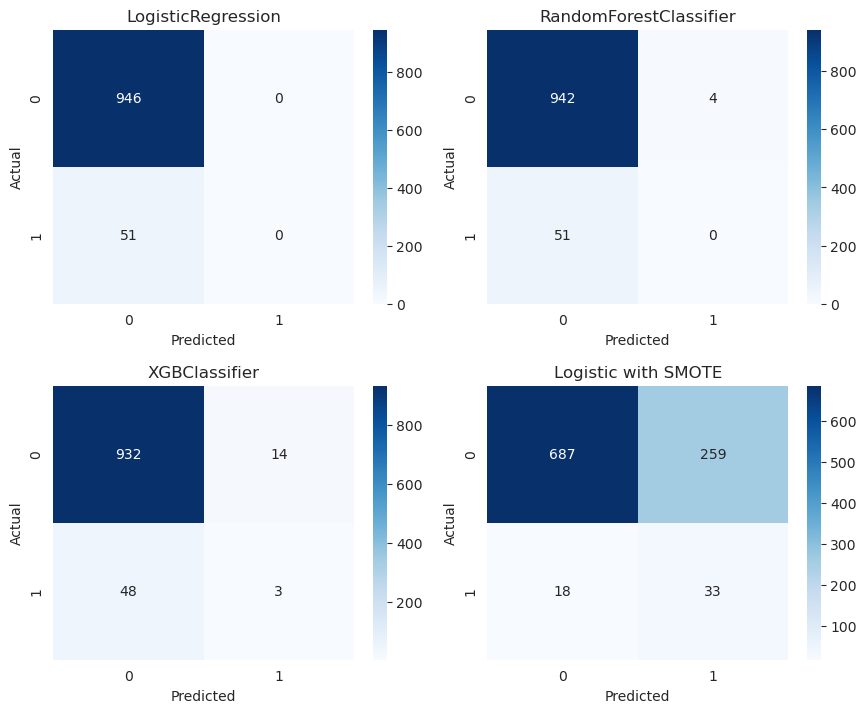

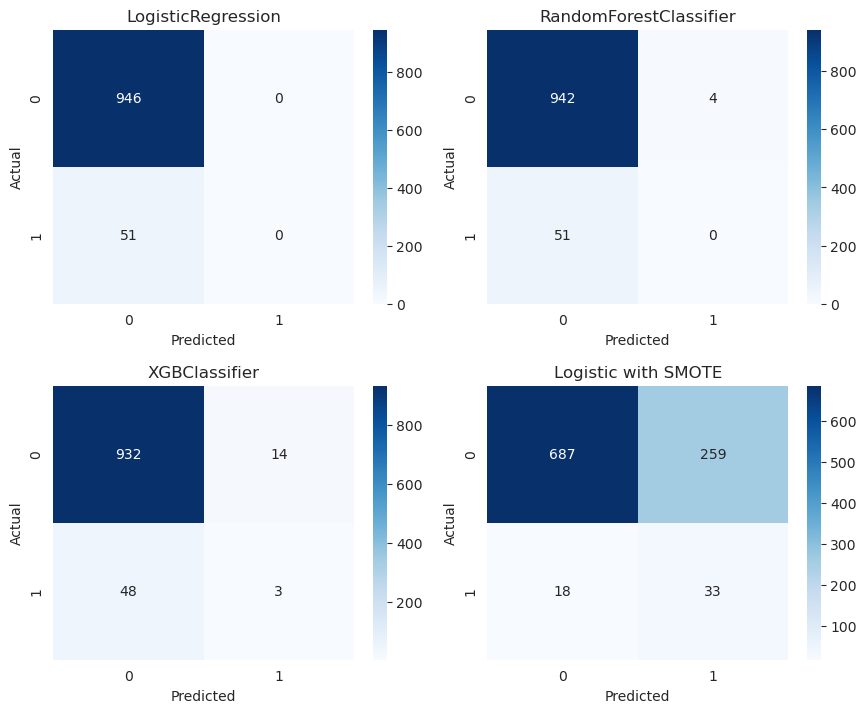

In [62]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9,7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot = True, fmt = 'd', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left = 0, right = 0.9, top = 0.9, bottom = 0)
plt.show(0)

In [63]:
# AUC & ROC Curve Homework
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Precession - recall curve
from sklearn.metrics import PredictionErrorDisplay

In [65]:
x = df_inputs[numerical_cols + encoded_cols]
# not categorical_cols because we need to continue in numerical values

y = dataframe[target_col]
# y_train is the target column of the dataframe

In [67]:
preds = lr_with_smote.predict(x_test)

In [71]:
# preds

In [75]:
sub_df = preds
pd.DataFrame(sub_df).to_csv("submission.csv", index = None)
sub_df = pd.read_csv("submission.csv")
sub_df.head()
# converted the predicted values into a dataframe

,0
0,0
1,0
2,0
3,1
4,0


In [76]:
sub_df['stroke'] = preds

In [77]:
sub_df

,0,stroke
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
992,0,0
993,1,1
994,0,0
995,1,1


In [79]:
dataframe.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [80]:
single_inputs = {
    'gender' : 'Male',
    'age' : 33,
    'hypertension' : 0,
    'heart_disease' : 0,
    'ever_married' : 'Yes',
    'work_type' : 'Private',
    'Residence_type' : 'Urban',
    'avg_glucose_level' : 79.53,
    'bmi' : 31.10,
    'smoking_status' : 'formerly smoked'
}

In [83]:
input_df = pd.DataFrame([single_inputs])
input_df[encoded_cols] = preprocesssor.transform(input_df)
X = input_df[numerical_cols + encoded_cols]
lr_with_smote.predict(X)

array([0])

In [87]:
model = {
    'encoded_cols' : encoded_cols,
    'numeric_cols' : numerical_cols,
    'preprocessor' : preprocesssor,
    'model' : lr_with_smote
}

joblib.dump(model, 'model.joblib')
# This saves the entire dictionary (model) to a file named model.joblib using joblib.

['model.joblib']